In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
data_folder_path = Path('../../../data/')

data = pd.read_csv(data_folder_path / 'data_train_all.csv')
data_columns = pd.read_csv(data_folder_path / 'data_train_all_columns.csv')
print("Training data shape:", data.shape)
print("Column table columns:", data_columns.columns)
print("Unique column types:", data_columns.column_type.unique())

predictor_columns = data_columns[data_columns['column_type'].isin(['predictor_continuous'])]['column_name'].tolist()
print(f"Number of predictorcolumns: {len(predictor_columns)}")

target_columns = data_columns[data_columns['column_type'] == 'target']['column_name'].tolist()
print(f"Target columns: {target_columns}")
print(f"Number of target columns: {len(target_columns)}")

Training data shape: (255606, 142)
Column table columns: Index(['column_name', 'column_type'], dtype='object')
Unique column types: ['id' 'data' 'target' 'predictor_continuous' 'predictor_n_grams']
Number of predictorcolumns: 10
Target columns: ['decade', 'main_genre', 'spotify_popularity']
Number of target columns: 3


Training set size: 204484
Test set size: 51122
Training Random Forest for: decade

Accuracy: 0.4158

Classification Report:
              precision    recall  f1-score   support

      1950.0       0.13      0.02      0.03       220
      1960.0       0.15      0.02      0.03      1330
      1970.0       0.16      0.02      0.03      2348
      1980.0       0.09      0.01      0.01      2791
      1990.0       0.18      0.05      0.08      5600
      2000.0       0.29      0.21      0.24     11656
      2010.0       0.46      0.84      0.59     21825
      2020.0       0.18      0.02      0.03      5352

    accuracy                           0.42     51122
   macro avg       0.20      0.15      0.13     51122
weighted avg       0.32      0.42      0.32     51122



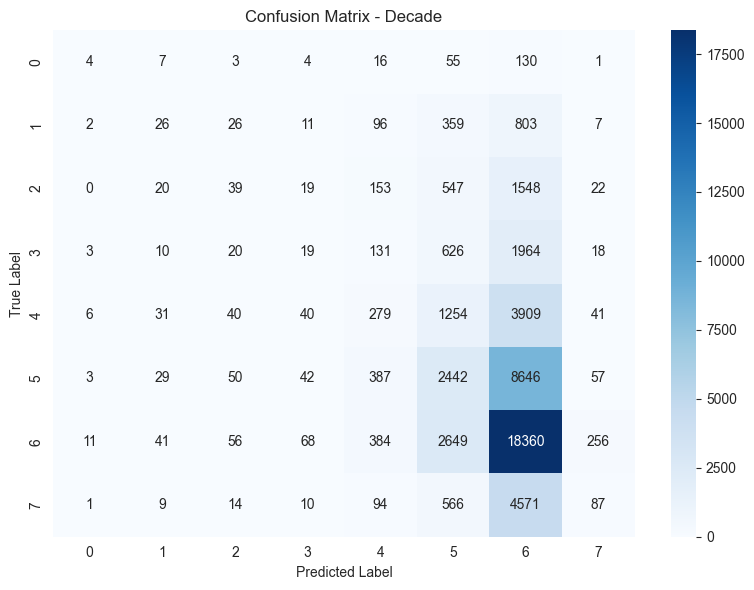


Top 20 features for decade:
                feature  importance
9  unique_chord_density    0.109375
2  unique_5gram_density    0.107699
8      average_2overlap    0.105034
4      average_4overlap    0.103567
3      average_3overlap    0.101163
5      average_5overlap    0.100358
0           drone_ratio    0.100001
1       average_overlap    0.099900
6       maj_triad_ratio    0.088072
7       min_triad_ratio    0.084830


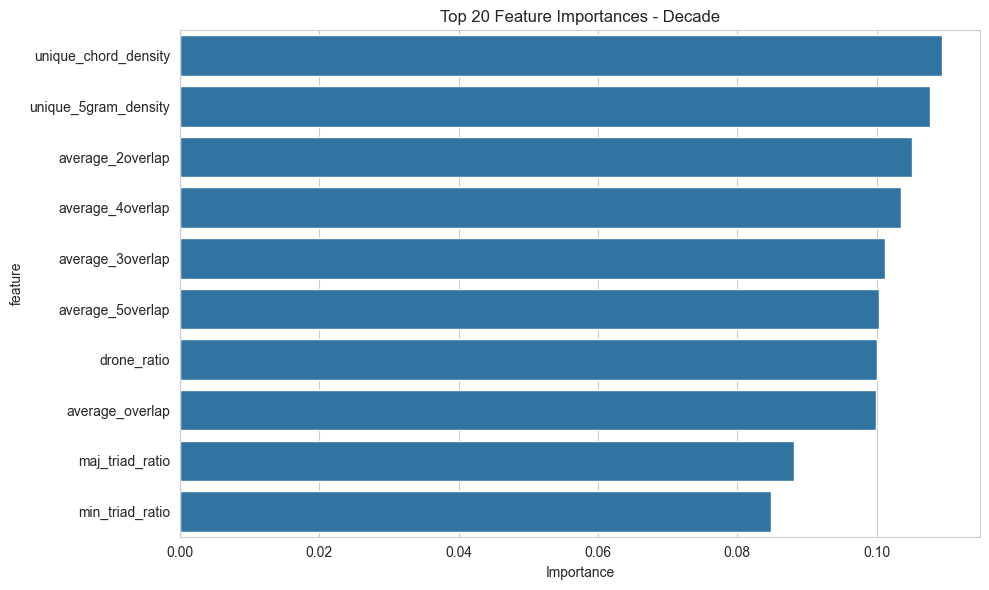

In [3]:
# Prepare data
X = data[predictor_columns]
y = data['decade']

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Train Random Forest
print(f"Training Random Forest for: decade")

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decade')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': predictor_columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 20 features for decade:")
print(feature_importance.head(20))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
plt.title('Top 20 Feature Importances - Decade')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

Training set size: 204484
Test set size: 51122
Training Random Forest for: genre

Accuracy: 0.2726

Classification Report:
              precision    recall  f1-score   support

 alternative       0.19      0.13      0.15      7177
     country       0.33      0.35      0.34      7599
  electronic       0.00      0.00      0.00       342
        jazz       0.26      0.05      0.08       898
       metal       0.17      0.02      0.03      1720
         pop       0.29      0.56      0.38     12342
    pop rock       0.13      0.03      0.05      5765
        punk       0.25      0.08      0.12      2446
         rap       0.19      0.07      0.11      1471
      reggae       0.15      0.03      0.05       557
        rock       0.25      0.29      0.27      9763
        soul       0.15      0.03      0.05      1042

    accuracy                           0.27     51122
   macro avg       0.20      0.14      0.14     51122
weighted avg       0.24      0.27      0.23     51122



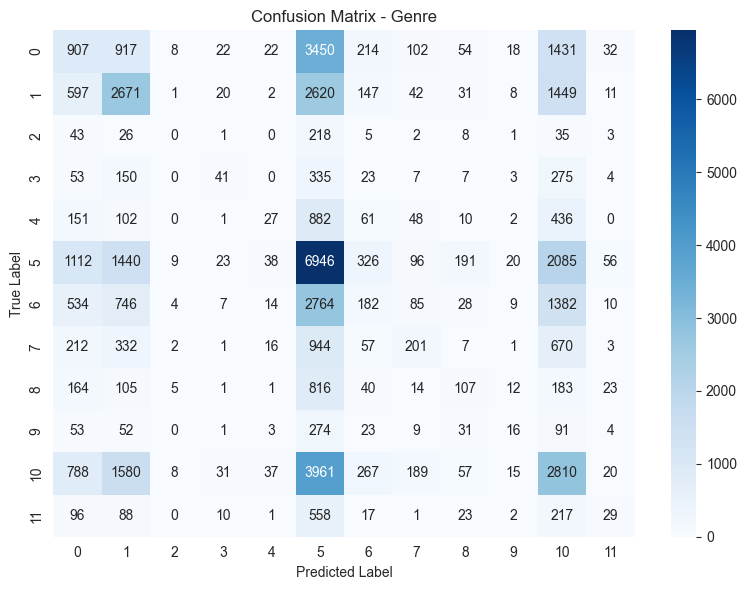


Top 20 features for genre:
                feature  importance
2  unique_5gram_density    0.107082
9  unique_chord_density    0.105155
8      average_2overlap    0.104753
4      average_4overlap    0.102567
5      average_5overlap    0.101936
1       average_overlap    0.101659
3      average_3overlap    0.101387
0           drone_ratio    0.099457
6       maj_triad_ratio    0.091151
7       min_triad_ratio    0.084854


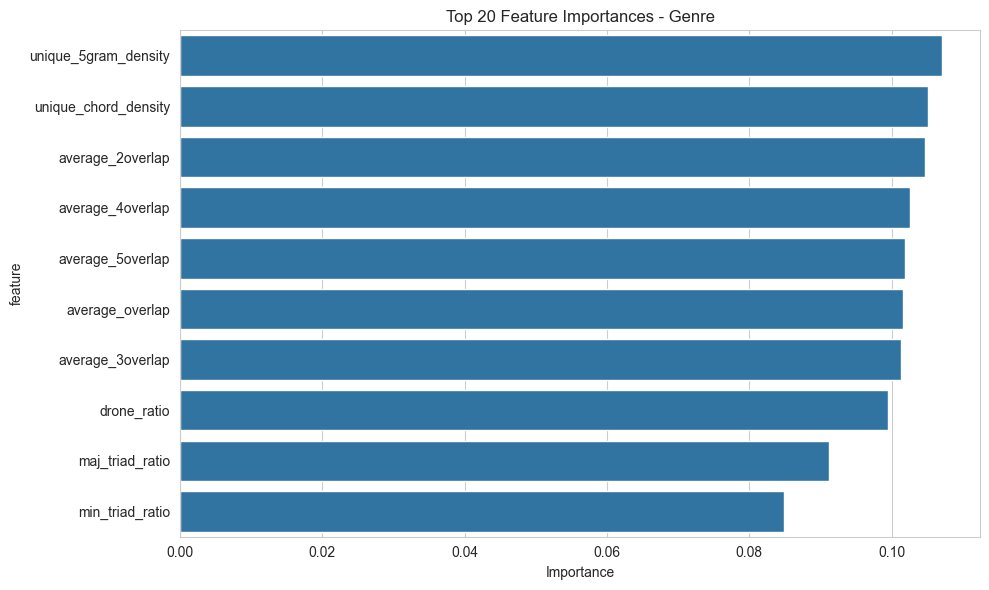

In [4]:
# Prepare data
X = data[predictor_columns]
y = data['main_genre']

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Train Random Forest
print(f"Training Random Forest for: genre")

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Genre')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': predictor_columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 20 features for genre:")
print(feature_importance.head(20))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
plt.title('Top 20 Feature Importances - Genre')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()